<a href="https://colab.research.google.com/github/AnkitNigam1985/Data-Science-Projects/blob/master/Machine_Learning_Foundation_Project_Predict_House_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction of house price using regression techniques**

![Housing price](https://miro.medium.com/max/750/0*XMbwmj-4r80bBuIg.jpg)


**Table of contents**

**1. Dataset for reference**

**2. Problem statement**

**3. Import all the required libraries**

**4. Reading the data**

**5. Get the basic statistical information about the dataset**

**6. Univariate analysis of categorical variables**

**7. Univariate analysis of continuos variables**

**8. Getting the missing value count**

**9. Imputing/Deletion of missing values**

**10. Univariate analysis of fields again to understand the distribution after removing null values**

**11. Bivariate analysis - Understanding the relation between features and with target variable**

**12. Dropping the irrelevant features from the input**

**13. Normalizing the target and input variables**

**14. Label Encoding of Categorical Columns**

**15. Verifying the assumptions of Linear Regression**

**16. Split the data into train and test**

**17. Applying Linear regression as baseline model to analyze the result**

**18. Applying other variance of regression model - Linear Regression using Grid Search CV with optimized parameters**

**19. Applying other variance of regression model - Random Forest Regression**

**20. Applying other variance of regression model - Decision Tree**

**21. Finalizing the preferred model from Linear Regression, Decision Tree and Random Forest**

**22. Result**

**1. Dataset for reference -**

https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv


**2. Problem statement**

From the given data, which consists of multiple parameters of a house, we need to predict the price of the house using multiple regression techniques  - linear regression, decision tree regressor and random forest regressor.

**Target data**

Target variable | Meaning
-|-
SalePrice | the property's sale price in dollars. 

**Input features**

Input Features|Meaning
-|-
MSSubClass| The building class
MSZoning| The general zoning classification
LotFrontage| Linear feet of street connected to property
LotArea| Lot size in square feet
Street| Type of road access
Alley| Type of alley access
LotShape| General shape of property
LandContour| Flatness of the property
Utilities| Type of utilities available
LotConfig| Lot configuration
LandSlope| Slope of property
Neighborhood| Physical locations within Ames city limits
Condition1| Proximity to main road or railroad
Condition2| Proximity to main road or railroad (if a second is present)
BldgType| Type of dwelling
HouseStyle| Style of dwelling
OverallQual| Overall material and finish quality
OverallCond| Overall condition rating
YearBuilt| Original construction date
YearRemodAdd| Remodel date
RoofStyle| Type of roof
RoofMatl| Roof material
Exterior1st| Exterior covering on house
Exterior2nd| Exterior covering on house (if more than one material)
MasVnrType| Masonry veneer type
MasVnrArea| Masonry veneer area in square feet
ExterQual| Exterior material quality
ExterCond| Present condition of the material on the exterior
Foundation| Type of foundation
BsmtQual| Height of the basement
BsmtCond| General condition of the basement
BsmtExposure| Walkout or garden level basement walls
BsmtFinType1| Quality of basement finished area
BsmtFinSF1| Type 1 finished square feet
BsmtFinType2| Quality of second finished area (if present)
BsmtFinSF2| Type 2 finished square feet
BsmtUnfSF| Unfinished square feet of basement area
TotalBsmtSF| Total square feet of basement area
Heating| Type of heating
HeatingQC| Heating quality and condition
CentralAir| Central air conditioning
Electrical| Electrical system
1stFlrSF| First Floor square feet
2ndFlrSF| Second floor square feet
LowQualFinSF| Low quality finished square feet (all floors)
GrLivArea| Above grade (ground) living area square feet
BsmtFullBath| Basement full bathrooms
BsmtHalfBath| Basement half bathrooms
FullBath| Full bathrooms above grade
HalfBath| Half baths above grade
Bedroom| Number of bedrooms above basement level
Kitchen| Number of kitchens
KitchenQual| Kitchen quality
TotRmsAbvGrd| Total rooms above grade (does not include bathrooms)
Functional| Home functionality rating
Fireplaces| Number of fireplaces
FireplaceQu| Fireplace quality
GarageType| Garage location
GarageYrBlt| Year garage was built
GarageFinish| Interior finish of the garage
GarageCars| Size of garage in car capacity
GarageArea| Size of garage in square feet
GarageQual| Garage quality
GarageCond| Garage condition
PavedDrive| Paved driveway
WoodDeckSF| Wood deck area in square feet
OpenPorchSF| Open porch area in square feet
EnclosedPorch| Enclosed porch area in square feet
3SsnPorch| Three season porch area in square feet
ScreenPorch| Screen porch area in square feet
PoolArea| Pool area in square feet
PoolQC| Pool quality
Fence| Fence quality
MiscFeature| Miscellaneous feature not covered in other categories
MiscVal| $Value of miscellaneous feature
MoSold| Month Sold
YrSold| Year Sold
SaleType| Type of sale
SaleCondition| Condition of sale


**3. Import all the required libraries**

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import kurtosis, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import randint as sp_randint

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

**4. Reading the data**

In [102]:
house_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**5. Get the basic statistical information about the dataset**

In [103]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Get the statistical information for all numeric features**

In [104]:
house_data.select_dtypes(include=['int','float','int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


We can observe that some fields like LotFrontage,GarageYrBlt have missing values, but missing count is not huge

**6. Univariate analysis of categorical variables**

**Get the statistical information about categorical features**

In [105]:
house_data.select_dtypes(include='object').describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


We can observe that features like Alley,FirePlaceQu,PoolIQC,Fence and MiscFeature have huge missing value count

Also, 

Neighborhood - 25,

Exterior1st - 15,

Exterior2nd - 16 

have large count of different categories in the values

**7. Univariate analysis of continuous variables**

In [106]:
num_desc_df=house_data.select_dtypes(include=['float','int','int64','float64']).describe().T
num_desc_df

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Get the right-skewed columns (mean > median)**

In [107]:
num_desc_df[num_desc_df['mean']>num_desc_df['50%']][['mean','50%']]

,mean,50%
MSSubClass,56.897260,50.0
LotFrontage,70.049958,69.0
LotArea,10516.828082,9478.5
OverallQual,6.099315,6.0
OverallCond,5.575342,5.0
MasVnrArea,103.685262,0.0
BsmtFinSF1,443.639726,383.5
BsmtFinSF2,46.549315,0.0
BsmtUnfSF,567.240411,477.5
TotalBsmtSF,1057.429452,991.5


**Get the left-skewed columns (mean<median)**

In [108]:
num_desc_df[num_desc_df['mean']<num_desc_df['50%']][['mean','50%']]

,mean,50%
YearBuilt,1971.267808,1973.0
YearRemodAdd,1984.865753,1994.0
FullBath,1.565068,2.0
BedroomAbvGr,2.866438,3.0
Fireplaces,0.613014,1.0
GarageYrBlt,1978.506164,1980.0
GarageCars,1.767123,2.0
GarageArea,472.980137,480.0
YrSold,2007.815753,2008.0


**8. Getting the missing value count**

In [109]:
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

We can observe some missing data from above information, need to get the columns with missing information

In [110]:
missing_tmp_data=house_data.isnull().sum()/len(house_data)*100
missing_tmp_df=pd.DataFrame(missing_tmp_data, columns=['Percentage'])
missing_tmp_df=missing_tmp_df[missing_tmp_df.Percentage>0].sort_values(by='Percentage',ascending=False)
missing_tmp_df

,Percentage
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


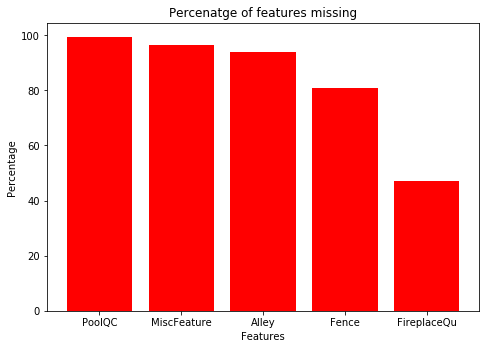

In [111]:
house_params=missing_tmp_df[missing_tmp_df.Percentage>40].index.values
house_percent=missing_tmp_df[missing_tmp_df.Percentage>40].Percentage
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(house_params,house_percent, color='red')
plt.xlabel("Features")
plt.ylabel("Percentage")
plt.title("Percenatge of features missing")
plt.show()

We can observe the huge missing count in few columns as we observed before, the missing data needs to be populated with the appropriate values

**9. Imputing/Deletion of missing values**

**Handling missing values for categorical features**

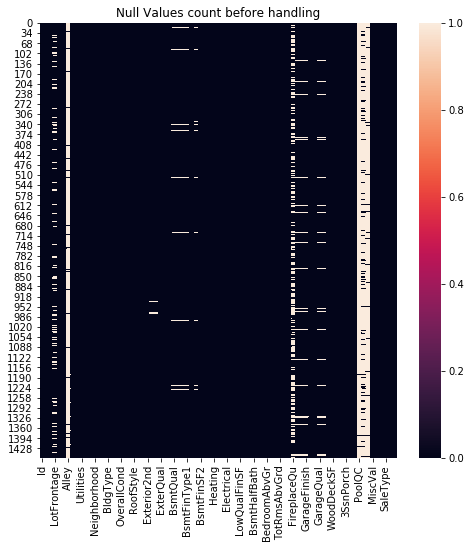

In [112]:
plt.figure(figsize=(8,8))
sns.heatmap(house_data.isnull())
plt.title("Null Values count before handling")
plt.show()

We can observe huge count of missing values in Alley,FirePlaceQu,PoolIQC

In [0]:
#Alley,PoolQC,Fence,MiscFeature have huge count of NA values, as per the documentation, NA means "None", 
#so missing values in these 4 columns can be populated with "None"
#house_data.Alley=house_data.Alley.fillna('NA')
#house_data.PoolQC=house_data.PoolQC.fillna('NA')
#house_data.Fence=house_data.Fence.fillna('NA')
#house_data.MiscFeature=house_data.MiscFeature.fillna('NA')

In [0]:
#Can drop columns with high missing value count
house_data.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [0]:
#Replace with median values
house_data.MSZoning=house_data.MSZoning.fillna(house_data.MSZoning.mode()[0])
house_data.Utilities=house_data.Utilities.fillna(house_data.Utilities.mode()[0])
house_data.Exterior1st=house_data.Exterior1st.fillna(house_data.Exterior1st.mode()[0])
house_data.Exterior2nd=house_data.Exterior2nd.fillna(house_data.Exterior2nd.mode()[0])
house_data.Electrical=house_data.Electrical.fillna(house_data.Electrical.mode()[0])
house_data.KitchenQual=house_data.KitchenQual.fillna(house_data.KitchenQual.mode()[0])
house_data.Functional=house_data.Functional.fillna(house_data.Functional.mode()[0])
house_data.SaleType=house_data.SaleType.fillna(house_data.SaleType.mode()[0])

In [0]:
#Replace with "None"
house_data.MasVnrType=house_data.MasVnrType.fillna('None')
house_data.BsmtQual=house_data.BsmtQual.fillna('NA')
house_data.BsmtCond=house_data.BsmtCond.fillna('NA')
house_data.BsmtExposure=house_data.BsmtExposure.fillna('NA')
house_data.BsmtFinType1=house_data.BsmtFinType1.fillna('NA')
house_data.BsmtFinType2=house_data.BsmtFinType2.fillna('NA')
house_data.FireplaceQu=house_data.FireplaceQu.fillna('NA')
house_data.GarageType=house_data.GarageType.fillna('NA')
house_data.GarageFinish=house_data.GarageFinish.fillna('NA')
house_data.GarageQual=house_data.GarageQual.fillna('NA')
house_data.GarageCond=house_data.GarageCond.fillna('NA')

Handling missing values for numerical features

In [0]:
house_data.LotFrontage=house_data.LotFrontage.fillna(house_data.LotFrontage.median())
house_data.MasVnrArea=house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())
#house_data.LotFrontage = house_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

#Basement related values can be None, so set the below fields to 0 
house_data.BsmtFinSF1=house_data.BsmtFinSF1.fillna(0)
house_data.BsmtFinSF2=house_data.BsmtFinSF2.fillna(0)
house_data.TotalBsmtSF=house_data.TotalBsmtSF.fillna(0)
house_data.BsmtUnfSF=house_data.BsmtUnfSF.fillna(0)
house_data.BsmtFullBath=house_data.BsmtFullBath.fillna(0)
house_data.BsmtHalfBath=house_data.BsmtHalfBath.fillna(0)

#since Garage related categorical values can be NULL, so Below values can be 0 assuming no garage data, no garage available
house_data.GarageYrBlt=house_data.GarageYrBlt.fillna(0)
house_data.GarageCars=house_data.GarageCars.fillna(0)
house_data.GarageArea=house_data.GarageArea.fillna(0)

In [117]:
missing_tmp_data=house_data.isnull().sum()/len(house_data)*100
missing_tmp_df=pd.DataFrame(missing_tmp_data, columns=['Percentage'])
missing_tmp_df=missing_tmp_df[missing_tmp_df.Percentage>0].sort_values(by='Percentage',ascending=False)
missing_tmp_df

,Percentage


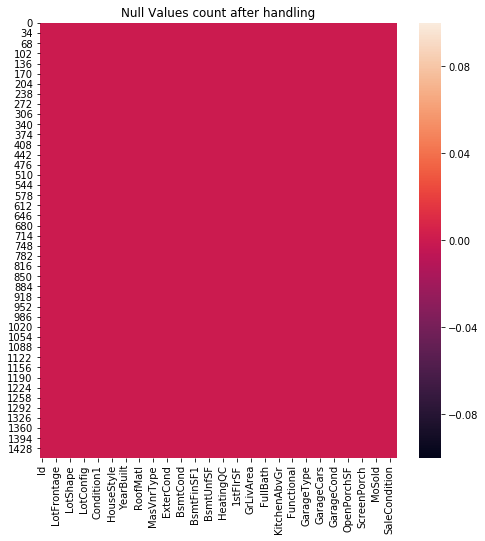

In [118]:
plt.figure(figsize=(8,8))
sns.heatmap(house_data.isnull())
plt.title("Null Values count after handling")
plt.show()

**10. Univariate analysis of fields again to understand the distribution after removing null values**

In [119]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**For Categorical variables**

In [120]:
house_data.select_dtypes(include='object').describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


In [121]:
cat_columns=house_data.select_dtypes(include='object').columns.to_list()
cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

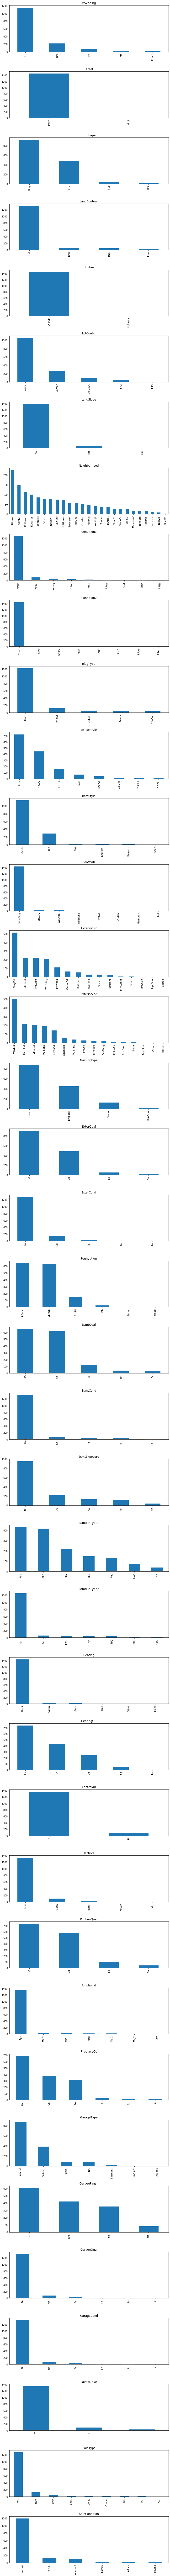

In [122]:
fig, ax=plt.subplots(len(cat_columns),1,figsize=(10,150))
for i,axes in enumerate(ax):
  house_data[cat_columns[i]].value_counts().plot(kind='bar', ax=axes)
  axes.set_title(cat_columns[i])

fig.tight_layout()

Most common values that we may need to consider if any of the below columns have impact on dataset

Columns		|	Mode Values
-|-
MsZoning	|	RL, RH and C(all)  | negligible count
Street		|	Pave , Grvl | negligible count
Alley		|	NA
LandContour	|	Lvl
Utilities	|	Allpub, NoSewa | almost zero
LandSlope	|	Gtl
Condition1	|	Norm
Condition2	|	Norm
BldgType	|	1 Fam
RoofMatl	|	CompShg
ExtrCond	|	TA
BsmtCond	|	TA
BsmtFinType2	|	Unf
Heating		|	GaSA
CenteralAir	|	Y
Electrcial	|	SBrkr
Functional	|	Typ
GarageQual	|	TA
GarageCond	|	TA
PavedDrive	|	Y
PoolQC		|	NA
Fence		|	NA
MiscFeature	|	NA
SaleTupe	|	WD
SaleCondition	|	Normal

**Analysis on numerical columns**

In [123]:
house_data.select_dtypes(include=['float','int','int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Again checking the right-skewed and left-skewed columns**

In [124]:
num_desc_df[num_desc_df['mean']>num_desc_df['50%']][['mean','50%']]

,mean,50%
MSSubClass,56.897260,50.0
LotFrontage,70.049958,69.0
LotArea,10516.828082,9478.5
OverallQual,6.099315,6.0
OverallCond,5.575342,5.0
MasVnrArea,103.685262,0.0
BsmtFinSF1,443.639726,383.5
BsmtFinSF2,46.549315,0.0
BsmtUnfSF,567.240411,477.5
TotalBsmtSF,1057.429452,991.5


In [125]:
num_desc_df[num_desc_df['mean']<num_desc_df['50%']][['mean','50%']]

,mean,50%
YearBuilt,1971.267808,1973.0
YearRemodAdd,1984.865753,1994.0
FullBath,1.565068,2.0
BedroomAbvGr,2.866438,3.0
Fireplaces,0.613014,1.0
GarageYrBlt,1978.506164,1980.0
GarageCars,1.767123,2.0
GarageArea,472.980137,480.0
YrSold,2007.815753,2008.0


For regression, the data has to be normalized but it seems data is skewed, we will plot the data to check its distribution

In [126]:
num_columns=house_data.select_dtypes(include=['float','int','int64','float64']).columns.to_list()
num_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

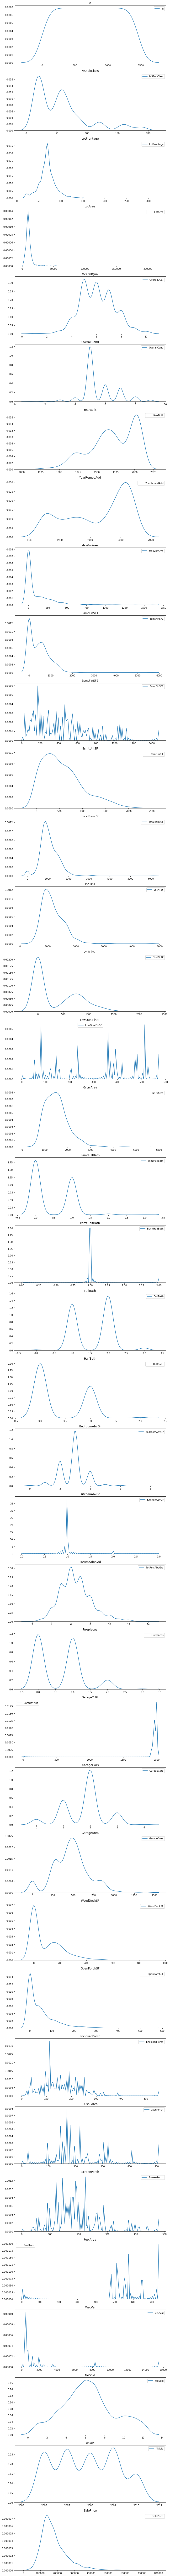

In [127]:
fig, ax=plt.subplots(len(num_columns),1,figsize=(10,150))
for i,axes in enumerate(ax):
  sns.kdeplot(house_data[num_columns[i]], ax=axes)
  axes.set_title(num_columns[i])

fig.tight_layout()

As observed from the data set, above distribution graphs determines that the numeric columns are skewed, so need to be normalized.

**11. Bivariate analysis - Understanding the relation between features and with target variable**

**Relationship between continuous variables and target variable**

In [128]:
corr=house_data.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.013491,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.099196,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.02645

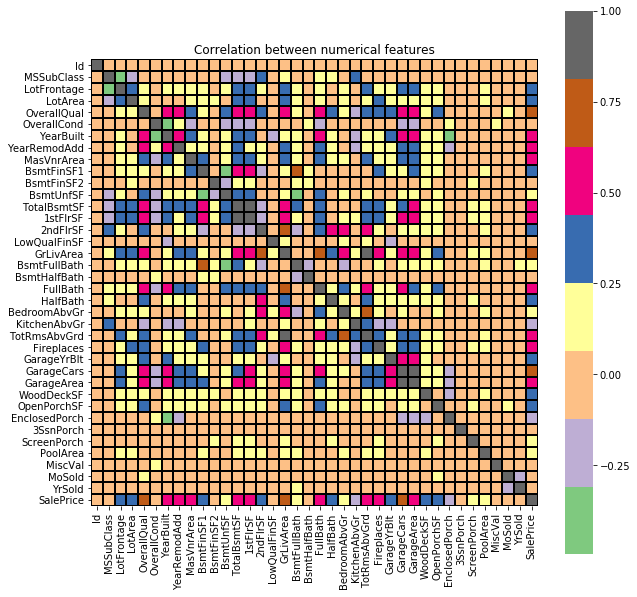

In [129]:
#Plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, linewidths=1, square=True, annot=False, cmap='Accent', linecolor='black')
plt.title("Correlation between numerical features")
plt.show()

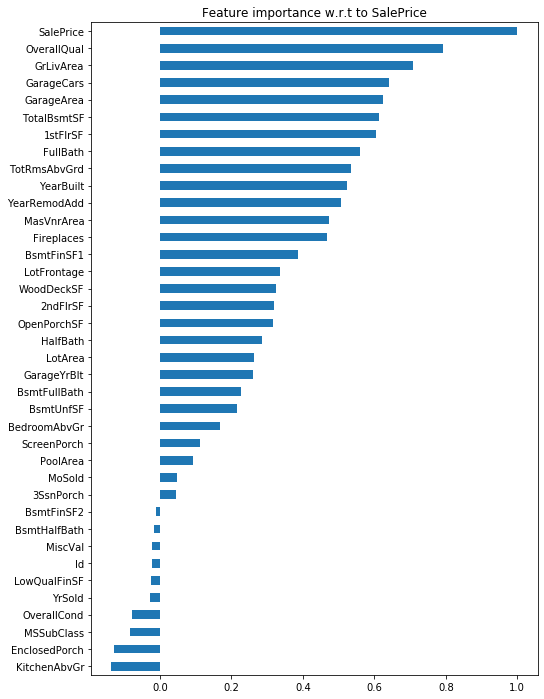

In [130]:
#Also, get the bar plot for SalesPrice correlation with all the feature for more clarity
plt.figure(figsize=(8, 12))
house_data.corr()['SalePrice'].sort_values().plot(kind='barh')
plt.title("Feature importance w.r.t to SalePrice")
plt.show()

From the above both the graphs, we obsereved the columns that have low or 0 correlation with SalePrice, that we may need to drop later before model the ML algorithm

**Columns with low correlation**

BsmtUnsf,BsmtFullBath,BedroomAbvGr,ScreenPorch,PoolArea

**Columns with almost 0 or -ve correlation**

Id,MSSubClass,OverallCond,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,,KitchenAbvGr,EnclosedPorch,3SnPorch,MiscVal,MoSold,YrSold


In [131]:
#Get the list of columns which are not highly correlated with target and can be dropped
corr_feat = house_data.corr()
low_corr_numcol=corr_feat.index[(abs(corr_feat["SalePrice"])<0.3)].to_list()
low_corr_numcol

['Id',
 'MSSubClass',
 'LotArea',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Further, we get the columns information which have high correlation with SalePrice (> 0.5)

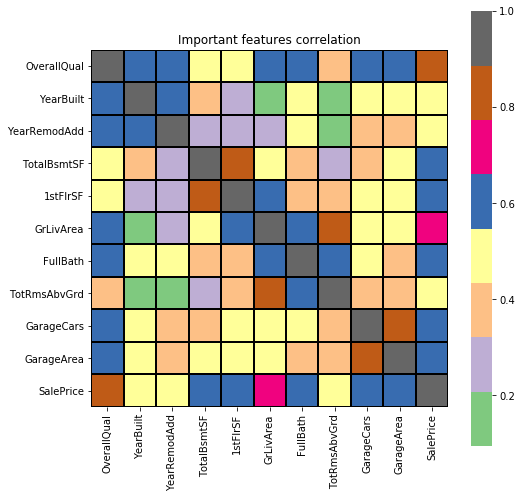

In [132]:
corr_feat = house_data.corr()
most_corr_feat = corr_feat.index[abs(corr_feat["SalePrice"])>0.5]
plt.figure(figsize=(8,8))
sns.heatmap(house_data[most_corr_feat].corr(),vmax=1, linewidths=1, 
                    square=True, annot=False, cmap='Accent', linecolor='black')
plt.title("Important features correlation")
plt.show()

Now, we can understand the relation between high correlated features using pairplot

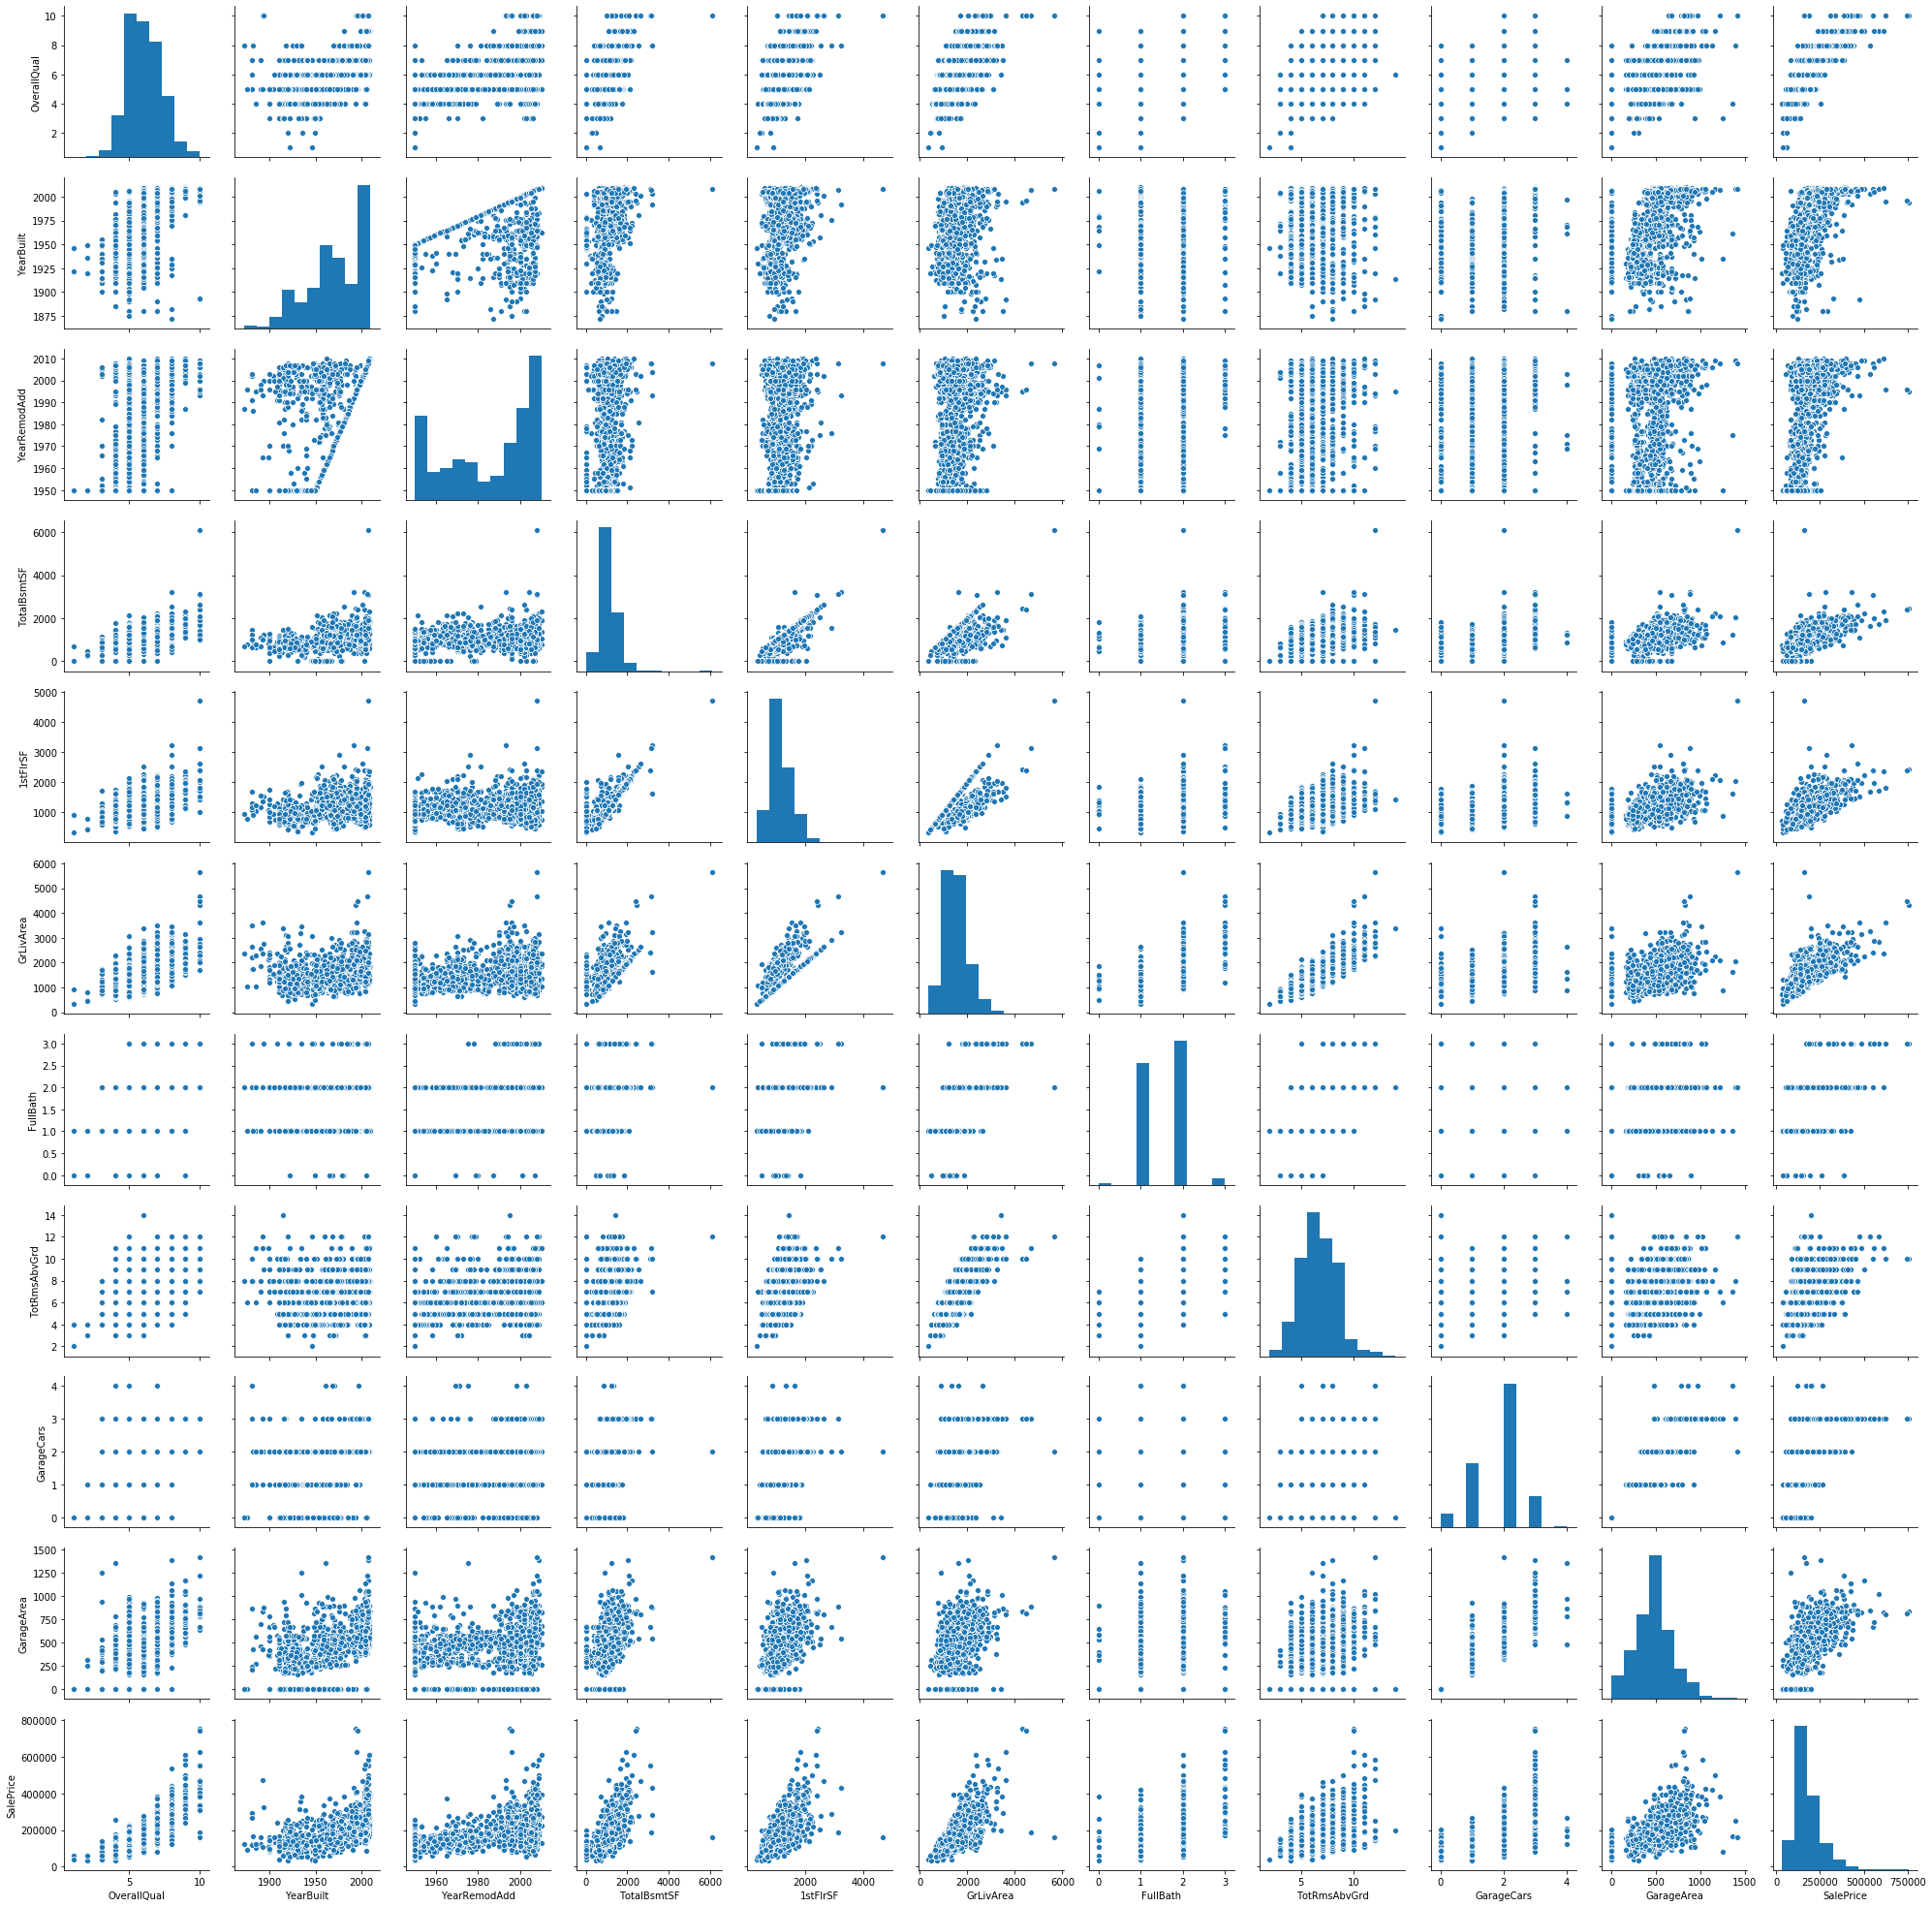

In [133]:
temp=house_data[most_corr_feat]
sns.pairplot(temp)
plt.show("Relation between important features")
plt.show()

All the above columns are highly correlated to SalePrice.

But,

Below columns are highly correlated to each other

Column 1| Column 2
--- | ---
OverallQual | YearBuilt
OverallQual|YearRemodAdd
OverallQual|GrLivArea
OverallQual|FullBath
OverallQual|GarageCars
OverallQual|GarageArea
YearBult|YearRemodAdd


Very highly correlated-

Column 1| Column 2
--- | ---
TotalBsmtSF|1stFlrSF
GrLivArea|TotRmsAbvGrd
GarageCars|GarageArea


So, depending on ML model performace, one columns from neach pair which are comparatively less related to SalePrice will be dropped later

**Relationship between categorical variables and target variable - chi-square method**

Chi-Sqaure method is used to detect relationship between input features and target variable.
Based on the p-value, it can be decided, if particular column is relevant or not w.r.t to target variable - SalePrice, so can be dropped accordingly.

if p-vale < threshold value, feature is important else not important and can be dropped.

Currently threshold is taken 0.05, and can be changed based on the prediction accuracy result.

In [0]:
chi2=0
p=0
dof=0
expected=0
imp_catcols=[]
unimp_catcols=[]
prob_ar=[]

def get_chisquare_result(colX, alpha, p):
      if p < alpha:
          imp_catcols.append(colX)
      else:
          unimp_catcols.append(colX)
      prob_ar.append(round(p, 3))

def TestIndependence(colX, colY, alpha=0.05):
      X = house_data[colX].astype(str)
      Y = house_data[colY].astype(str)

      dfObserved = pd.crosstab(Y, X)
      chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
      dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
      get_chisquare_result(colX, alpha, p)

In [0]:
cat_columns = house_data.select_dtypes(include='object').columns.to_list()
for var in cat_columns:
  TestIndependence(colX=var, colY="SalePrice")

In [151]:
imp_catcols

['MSZoning',
 'Street',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [152]:
unimp_catcols

['LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [153]:
prob_ar

[0.0,
 0.0,
 0.0,
 0.087,
 1.0,
 0.046,
 0.105,
 0.0,
 1.0,
 0.076,
 1.0,
 0.648,
 1.0,
 1.0,
 1.0,
 0.847,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.213,
 0.948,
 0.0,
 1.0,
 0.0,
 0.053,
 0.0,
 1.0,
 0.0,
 0.065,
 0.0,
 0.05,
 1.0,
 0.991,
 0.0,
 0.0]

In [156]:
tempdf=pd.DataFrame({'Columns':cat_columns, 'P-value':prob_ar}, index=range(len(cat_columns)))
tempdf.sort_values(by='P-value', ascending=True)

,Columns,P-value
0,MSZoning,0.000
33,GarageFinish,0.000
31,FireplaceQu,0.000
29,KitchenQual,0.000
27,CentralAir,0.000
25,Heating,0.000
22,BsmtExposure,0.000
21,BsmtCond,0.000
20,BsmtQual,0.000
37,SaleType,0.000


In [170]:
t=tempdf[tempdf['P-value']<0.05]
t.reset_index(drop=True, inplace=True)
t

,Columns,P-value
0,MSZoning,0.000
1,Street,0.000
2,LotShape,0.000
3,LotConfig,0.046
4,Neighborhood,0.000
5,MasVnrType,0.000
6,ExterQual,0.000
7,ExterCond,0.000
8,Foundation,0.000
9,BsmtQual,0.000


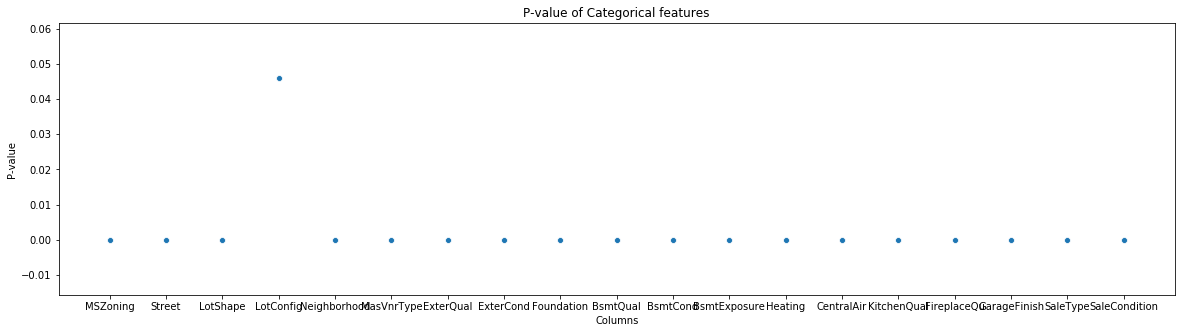

In [177]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=t['Columns'], y=t['P-value'])
plt.title("P-value of Categorical features")
plt.show()

**12. Dropping the irrelevant features from the input**

Now the numerical and categorical columns have been determined and  can be dropped

In [178]:
#Numerical columns that can be dropped
low_corr_numcol

['Id',
 'MSSubClass',
 'LotArea',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [179]:
#Categorical columns that can be dropped
unimp_catcols

['LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [0]:
house_data.drop(low_corr_numcol, axis=1, inplace=True)
house_data.drop(unimp_catcols, axis=1, inplace=True)

Further, we have observed that below features can also be dropped as they are highly correlated to other input features which are more highly correlated to target variable

1stFlrSF,TotRmsAbvGrd,GarageArea

In [0]:
house_data.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'], axis=1, inplace=True)

In [182]:
house_data.shape

(1460, 34)

In [183]:
house_data.head()

,MSZoning,LotFrontage,Street,LotShape,LotConfig,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,TotalBsmtSF,Heating,CentralAir,2ndFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,Pave,Reg,Inside,CollgCr,7,2003,2003,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,706,856,GasA,Y,854,1710,2,Gd,0,NA,RFn,2,0,61,WD,Normal,208500
1,RL,80.0,Pave,Reg,FR2,Veenker,6,1976,1976,None,0.0,TA,TA,CBlock,Gd,TA,Gd,978,1262,GasA,Y,0,1262,2,TA,1,TA,RFn,2,298,0,WD,Normal,181500
2,RL,68.0,Pave,IR1,Inside,CollgCr,7,2001,2002,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,486,920,GasA,Y,866,1786,2,Gd,1,TA,RFn,2,0,42,WD,Normal,223500
3,RL,60.0,Pave,IR1,Corner,Crawfor,7,1915,1970,None,0.0,TA,TA,BrkTil,TA,Gd,No,216,756,GasA,Y,756,1717,1,Gd,1,Gd,Unf,3,0,35,WD,Abnorml,140000
4,RL,84.0,Pave,IR1,FR2,NoRidge,8,2000,2000,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,655,1145,GasA,Y,1053,2198,2,Gd,1,TA,RFn,3,192,84,WD,Normal,250000


**13. Normalizing the target and input variables**

In [0]:
y=house_data.SalePrice

In [185]:
y.shape

(1460,)

In [0]:
X=house_data.drop('SalePrice', axis=1)

In [187]:
X.shape

(1460, 33)

In [191]:
X.describe()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,6.099315,1971.267808,1984.865753,103.117123,443.639726,1057.429452,346.992466,1515.463699,1.565068,0.613014,1.767123,94.244521,46.660274
std,22.027677,1.382997,30.202904,20.645407,180.731373,456.098091,438.705324,436.528436,525.480383,0.550916,0.644666,0.747315,125.338794,66.256028
min,21.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,795.750000,0.000000,1129.500000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,69.000000,6.000000,1973.000000,1994.000000,0.000000,383.500000,991.500000,0.000000,1464.000000,2.000000,1.000000,2.000000,0.000000,25.000000
75%,79.000000,7.000000,2000.000000,2004.000000,164.250000,712.250000,1298.250000,728.000000,1776.750000,2.000000,1.000000,2.000000,168.000000,68.000000
max,313.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,2065.000000,5642.000000,3.000000,3.000000,4.000000,857.000000,547.000000


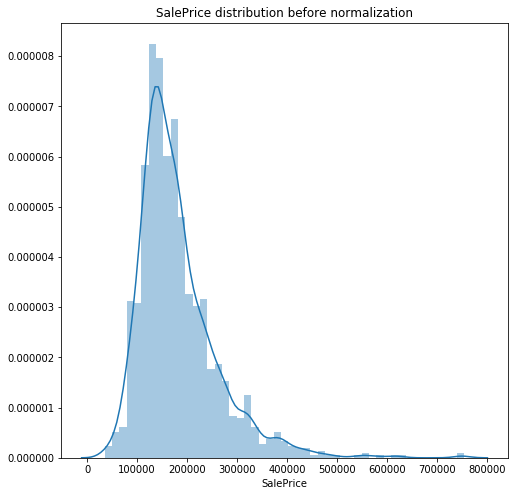

In [190]:
plt.figure(figsize=(8,8))
sns.distplot(y)
plt.title("SalePrice distribution before normalization")
plt.show()

In [192]:
y.skew()

1.8828757597682129

In [193]:
y.kurt()

6.536281860064529

In [0]:
#Transforming logarithmic operation to normalize the SalePrice data
y = np.log1p(y)

In [195]:
y.skew()

0.12134661989685333

In [196]:
y.kurt()

0.809519155707878

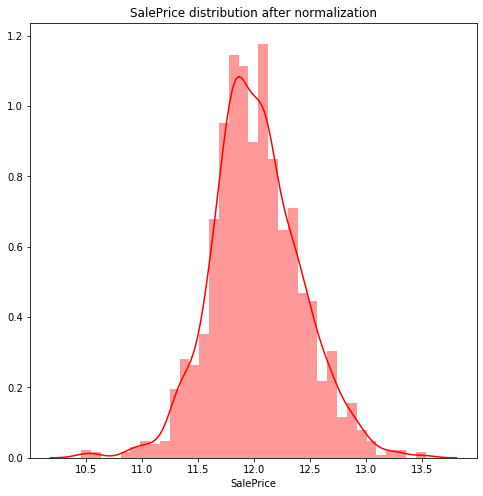

In [197]:
plt.figure(figsize=(8,8))
sns.distplot(y,color='r')
plt.title("SalePrice distribution after normalization")
plt.show()

SalePrice is now seems to be normalized

Now, we will normalize the input features data

In [198]:
num_feat=X.dtypes[X.dtypes!='object'].index
num_feat

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [199]:
skewed_feats = X[num_feat].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

MasVnrArea      2.674865
LotFrontage     2.406671
OpenPorchSF     2.361912
BsmtFinSF1      1.683771
WoodDeckSF      1.539792
TotalBsmtSF     1.522688
GrLivArea       1.365156
2ndFlrSF        0.812194
Fireplaces      0.648898
OverallQual     0.216721
FullBath        0.036524
GarageCars     -0.342197
YearRemodAdd   -0.503044
YearBuilt      -0.612831
dtype: float64

In [200]:
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

MasVnrArea      2.674865
LotFrontage     2.406671
OpenPorchSF     2.361912
BsmtFinSF1      1.683771
WoodDeckSF      1.539792
TotalBsmtSF     1.522688
GrLivArea       1.365156
2ndFlrSF        0.812194
Fireplaces      0.648898
YearRemodAdd   -0.503044
YearBuilt      -0.612831
dtype: float64

In [0]:
skew_index = high_skew.index

In [202]:
for i in skew_index:
    X[i] = boxcox1p(X[i], boxcox_normmax(X[i] + 1))

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [203]:
X.shape

(1460, 33)

In [204]:
X.head()

,MSZoning,LotFrontage,Street,LotShape,LotConfig,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,TotalBsmtSF,Heating,CentralAir,2ndFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RL,9.646419,Pave,Reg,Inside,CollgCr,7,5.185687e+52,8.064887e+235,BrkFace,19.340338,Gd,TA,PConc,Gd,TA,No,118.098009,252.446471,GasA,Y,1273.318852,7.744829,2,Gd,0.000000,NA,RFn,2,0.000000,12.049772,WD,Normal
1,RL,10.586092,Pave,Reg,FR2,Veenker,6,4.155196e+52,3.036645e+235,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,147.125753,342.556447,GasA,Y,0.000000,7.416975,2,TA,0.919485,TA,RFn,2,62.298509,0.000000,WD,Normal
2,RL,9.844617,Pave,IR1,Inside,CollgCr,7,5.101805e+52,7.780172e+235,BrkFace,17.687636,Gd,TA,PConc,Gd,TA,Mn,91.750444,267.178842,GasA,Y,1292.446084,7.791849,2,Gd,0.919485,TA,RFn,2,0.000000,9.878686,WD,Normal
3,RL,9.302748,Pave,IR1,Corner,Crawfor,7,2.490513e+52,2.439719e+235,None,0.000000,TA,TA,BrkTil,TA,Gd,No,52.861354,228.937528,GasA,Y,1117.828905,7.749245,1,Gd,0.919485,Gd,Unf,3,0.000000,8.946970,WD,Abnorml
4,RL,10.817369,Pave,IR1,FR2,NoRidge,8,5.060344e+52,7.240151e+235,BrkFace,25.266438,Gd,TA,PConc,Gd,TA,Av,112.267318,317.335350,GasA,Y,1592.738891,8.016603,2,Gd,0.919485,TA,RFn,3,46.391564,14.232142,WD,Normal


In [0]:
num_columns=X.select_dtypes(include=['float','float64','int','int64']).columns.to_list()

**14. Label Encoding of Categorical Columns**

In [0]:
X=pd.get_dummies(X, prefix_sep='_', drop_first=True)

In [209]:
X.shape

(1460, 107)

In [210]:
X.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,...,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.646419,7,5.185687e+52,8.064887e+235,19.340338,118.098009,252.446471,1273.318852,7.744829,2,0.000000,2,0.000000,12.049772,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,10.586092,6,4.155196e+52,3.036645e+235,0.000000,147.125753,342.556447,0.000000,7.416975,2,0.919485,2,62.298509,0.000000,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,9.844617,7,5.101805e+52,7.780172e+235,17.687636,91.750444,267.178842,1292.446084,7.791849,2,0.919485,2,0.000000,9.878686,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,9.302748,7,2.490513e+52,2.439719e+235,0.000000,52.861354,228.937528,1117.828905,7.749245,1,0.919485,3,0.000000,8.946970,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,10.817369,8,5.060344e+52,7.240151e+235,25.266438,112.267318,317.335350,1592.738891,8.016603,2,0.919485,3,46.391564,14.232142,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
#YearRemodAdd is inf after normalizing and YearBuilt has high range in foat value, and also not higly correlated, so can drop these
X.drop(['YearBuilt','YearRemodAdd'], axis=1, inplace=True)

In [212]:
X.dtypes

LotFrontage              float64
OverallQual                int64
MasVnrArea               float64
BsmtFinSF1               float64
TotalBsmtSF              float64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 105, dtype: object

**15. Verifying the assumptions of Linear Regression**

**There has to be linear relationship between input features and target variable**

In [0]:
#Deleting YearBuilt and YearRemodAdd from list
num_columns.remove('YearBuilt')
num_columns.remove('YearRemodAdd')

In [221]:
num_columns

['LotFrontage',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF']

In [215]:
temp=X[num_columns]
temp.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF
0,9.646419,7,19.340338,118.098009,252.446471,1273.318852,7.744829,2,0.000000,2,0.000000,12.049772
1,10.586092,6,0.000000,147.125753,342.556447,0.000000,7.416975,2,0.919485,2,62.298509,0.000000
2,9.844617,7,17.687636,91.750444,267.178842,1292.446084,7.791849,2,0.919485,2,0.000000,9.878686
3,9.302748,7,0.000000,52.861354,228.937528,1117.828905,7.749245,1,0.919485,3,0.000000,8.946970
4,10.817369,8,25.266438,112.267318,317.335350,1592.738891,8.016603,2,0.919485,3,46.391564,14.232142


In [218]:
temp=pd.concat([temp,y], axis=1)
temp.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
0,9.646419,7,19.340338,118.098009,252.446471,1273.318852,7.744829,2,0.000000,2,0.000000,12.049772,12.247699
1,10.586092,6,0.000000,147.125753,342.556447,0.000000,7.416975,2,0.919485,2,62.298509,0.000000,12.109016
2,9.844617,7,17.687636,91.750444,267.178842,1292.446084,7.791849,2,0.919485,2,0.000000,9.878686,12.317171
3,9.302748,7,0.000000,52.861354,228.937528,1117.828905,7.749245,1,0.919485,3,0.000000,8.946970,11.849405
4,10.817369,8,25.266438,112.267318,317.335350,1592.738891,8.016603,2,0.919485,3,46.391564,14.232142,12.429220


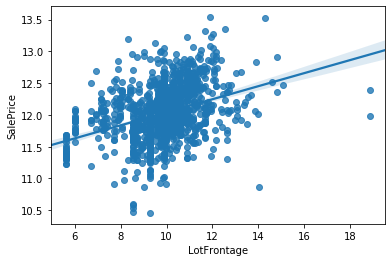

In [220]:
sns.regplot(temp['LotFrontage'], temp['SalePrice'])

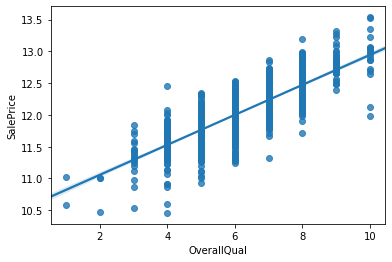

In [222]:
sns.regplot(temp['OverallQual'], temp['SalePrice'])

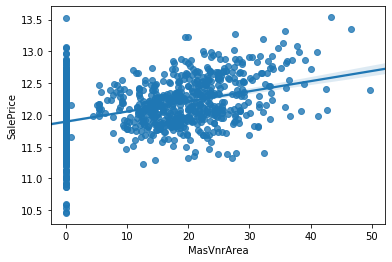

In [223]:
sns.regplot(temp['MasVnrArea'], temp['SalePrice'])

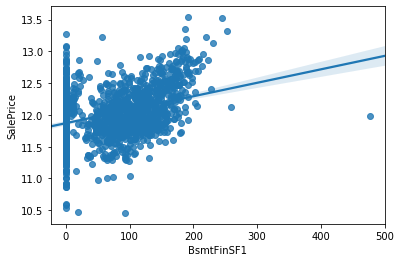

In [224]:
sns.regplot(temp['BsmtFinSF1'], temp['SalePrice'])

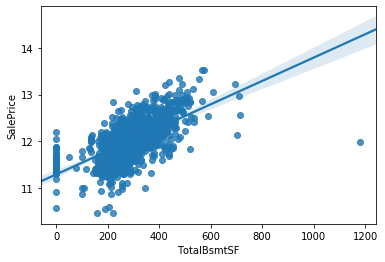

In [225]:
sns.regplot(temp['TotalBsmtSF'], temp['SalePrice'])

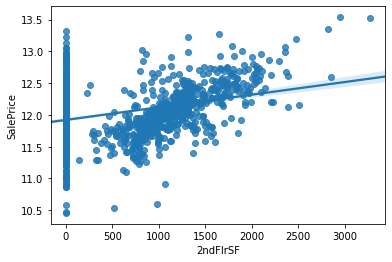

In [226]:
sns.regplot(temp['2ndFlrSF'], temp['SalePrice'])

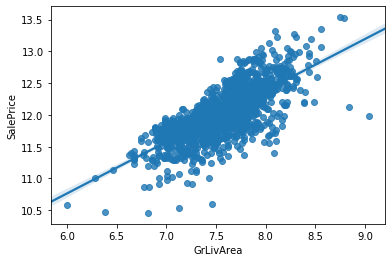

In [227]:
sns.regplot(temp['GrLivArea'], temp['SalePrice'])

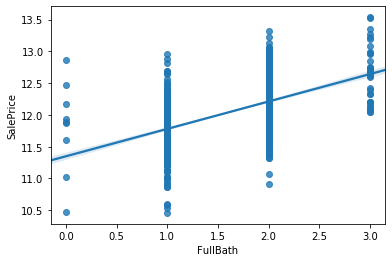

In [228]:
sns.regplot(temp['FullBath'], temp['SalePrice'])

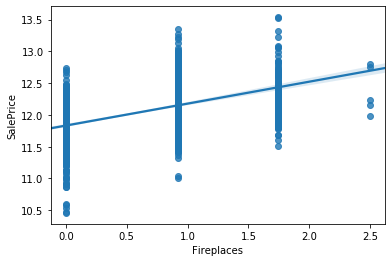

In [229]:
sns.regplot(temp['Fireplaces'], temp['SalePrice'])

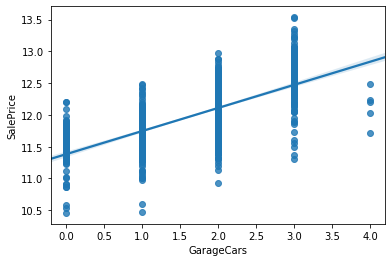

In [230]:
sns.regplot(temp['GarageCars'], temp['SalePrice'])

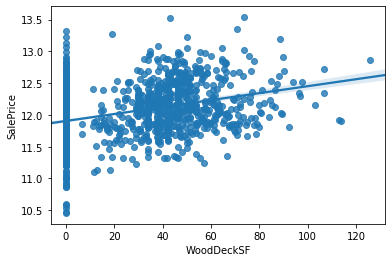

In [231]:
sns.regplot(temp['WoodDeckSF'], temp['SalePrice'])

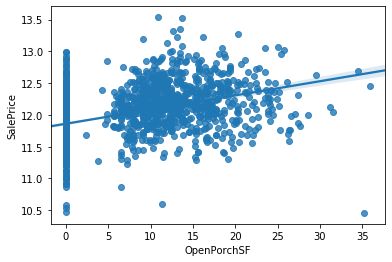

In [232]:
sns.regplot(temp['OpenPorchSF'], temp['SalePrice'])

From the above pairplot, we observed the linear relationship between SalePrice and important features which we have retained in the dataset for further processing.

**Target variable should be normally distributed**

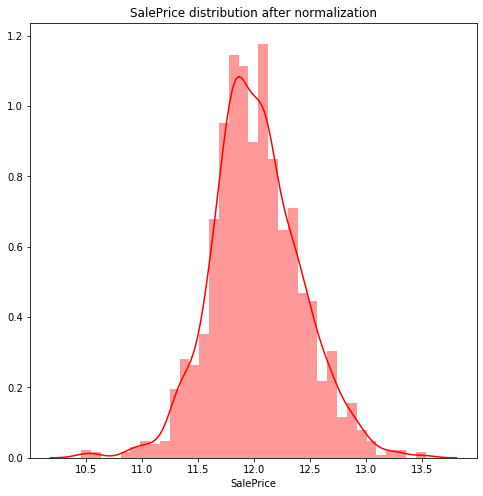

In [75]:
plt.figure(figsize=(8,8))
sns.distplot(y,color='r')
plt.title("SalePrice distribution after normalization")
plt.show()

Output variable is uniform distributed

**Independent features are not correlated - No multicollinearity**

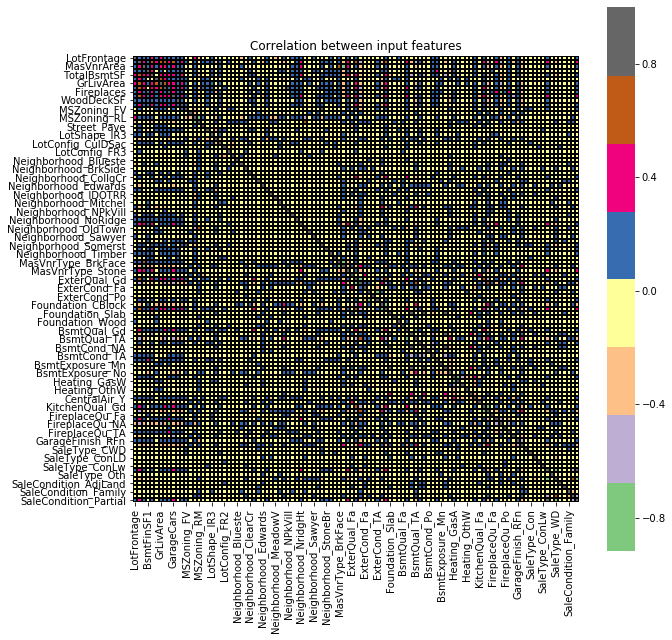

In [76]:
corr=X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, linewidths=1, square=True, annot=False, cmap='Accent', linecolor='black')
plt.title("Correlation between input features")
plt.show()

Almost no correlation between input features

**The error term must have constant variance - Homoscedasticity**

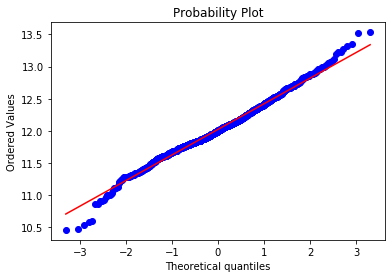

In [77]:
fig = plt.figure()
stats.probplot(y, plot=plt)
plt.show()

The output variable has constant variance

**16. Split the data into train and test**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [79]:
X_train.shape

(1168, 105)

In [80]:
X_test.shape

(292, 105)

In [81]:
y_train.shape

(1168,)

In [82]:
y_test.shape

(292,)

**17. Applying Linear regression as baseline model to analyze the result**

In [83]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
y_pred_train=linreg.predict(X_train)
print("For train data - MAE {}, MSE {}, RMSE {}".format(mean_absolute_error(y_train, y_pred_train),
                                                        mean_squared_error(y_train, y_pred_train),
                                                          np.sqrt(mean_squared_error(y_train, y_pred_train))))

For train data - MAE 0.0865631195916669, MSE 0.015315505608532698, RMSE 0.1237558306041889


In [85]:
y_pred_test=linreg.predict(X_test)
print("For test data - MAE {}, MSE {}, RMSE {}".format(mean_absolute_error(y_test, y_pred_test),
                                                        mean_squared_error(y_test, y_pred_test),
                                                          np.sqrt(mean_squared_error(y_test, y_pred_test))))

For test data - MAE 0.10050992819640815, MSE 0.018145423450854042, RMSE 0.134704949615276


In [86]:
linreg.coef_

array([ 3.19394052e-03,  5.31674216e-02, -1.00779566e-03,  5.00380148e-04,
        2.57034724e-06, -3.13037000e-05,  3.71064997e-01,  1.98939643e-02,
        1.72056566e-02,  6.08344666e-02,  5.22875597e-04,  1.59383140e-03,
        3.72694920e-01,  4.14857466e-01,  3.99695142e-01,  3.37859900e-01,
       -3.57508084e-02,  5.91798178e-02, -1.18747438e-01,  3.97773788e-03,
        4.71373492e-02, -1.94959360e-02, -7.61615878e-02, -6.82699787e-03,
       -1.03163892e-01, -7.63907812e-02,  4.45580117e-02,  1.05337598e-01,
        6.93067072e-02,  1.80822114e-01, -7.49153299e-02,  4.64683565e-02,
       -4.41605810e-03, -1.39462082e-01,  1.84964713e-02,  1.12352705e-02,
       -4.79997401e-02,  3.14338461e-02,  1.99332613e-01,  1.64688893e-01,
       -4.21991309e-02, -1.84928096e-02, -2.60853790e-03,  4.51359624e-02,
        1.10845361e-01,  1.73258941e-01,  8.00074517e-02,  7.82588357e-02,
        3.66652341e-02,  2.92319885e-02,  3.54339737e-02, -3.14720006e-02,
        5.55262436e-03,  

In [87]:
linreg.intercept_

8.39587472217214

**Calculating Bias and Variance to estimate whether the model is underfit or overfit and create result dataframe with all error values**

In [0]:
def create_result_dataframe(y_test, y_pred_test):
  df_out=pd.DataFrame()
  mean_predicted=np.mean(y_pred_test)
  bias=np.mean(y_test-mean_predicted)
  variance=np.mean(y_pred_test-y_test)
  mae=mean_absolute_error(y_test, y_pred_test)
  mse=mean_squared_error(y_test, y_pred_test)
  rmse=np.sqrt(mean_squared_error(y_test, y_pred_test))
  df_out=pd.DataFrame({'Bias':abs(bias),'Variance':abs(variance),'MAE':mae, 'MSE':mse, 'RMSE':rmse}, index=[0])

  return df_out

In [89]:
linear_baseline_df=create_result_dataframe(y_test, y_pred_test)
linear_baseline_df

,Bias,Variance,MAE,MSE,RMSE
0,0.00647,0.00647,0.10051,0.018145,0.134705


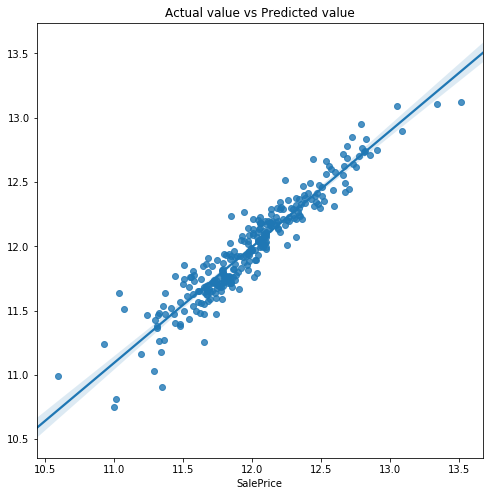

In [90]:
#Checking relationship between Predicted value and actual value
plt.figure(figsize=(8,8))
sns.regplot(y_test, y_pred_test)
plt.title("Actual value vs Predicted value")
plt.show()

As per the linear regression assumption, the relationship between Actual and Predicted values has to be linear, so it as per expectation.

Since mean bias and mean variance are around 0.006, so both bias and variance is low for baseline linear regression model prediction.

Therefore, We can assume model is fine

From baseline model, we get-

MAE (mean absolute error) - 0.0865631195916669

MSE (mean absolute error) - 0.015315505608532698

RMSE (root square mean absolute error) - 0.1237558306041889

So, from other advanced models, we will consider their result only if error values are less than above values

Further, we will check bias and variance should be lowe as above - 

mean bias = 0.006469934336845747

mean variance = 0.006469934336846094

**18. Applying other variance of regression model - Linear Regression using Grid Search CV with optimized parameters**

In [0]:
def linear_regression(X_train, X_test, y_test, y_train):
    linreg=LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred_train=linreg.predict(X_train)
    print("RMSE for train is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    parameters={'normalize':[True,False],'copy_X':[True, False], 'fit_intercept':[True,False]}
    linreg=GridSearchCV(linreg, parameters)
    linreg.fit(X_train, y_train)
    print(linreg.best_score_)
    print(linreg.best_estimator_)
    linreg=linreg.best_estimator_
    linreg.fit(X_train, y_train)
    y_pred_train=linreg.predict(X_train)
    print("RMSE for train is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    y_pred_test=linreg.predict(X_test)
    print("RMSE for test is {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

    plt.figure(figsize=(8,8))
    sns.regplot(y_test, y_pred_test)
    plt.title("Actual value vs Predicted value")
    plt.show()

    return create_result_dataframe(y_test, y_pred_test)

RMSE for train is 0.1237558306041889
0.8592273586670214
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
RMSE for train is 0.1237558306041889
RMSE for test is 0.134704949615276


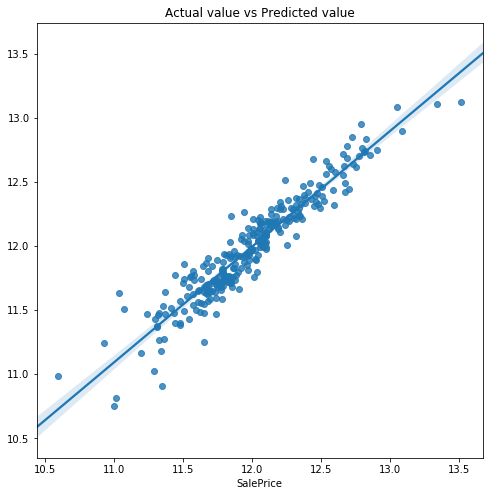

,Bias,Variance,MAE,MSE,RMSE
0,0.00647,0.00647,0.10051,0.018145,0.134705


In [92]:
linear_grid_df=linear_regression(X_train, X_test, y_test, y_train)
linear_grid_df

**19. Applying other variance of regression model - Random Forest Regression**

In [0]:
#Random Forest with Grid Search
def random_forest_regressor_grid(X_train, X_test, y_test, y_train):
    print(X_train.shape,X_test.shape,y_train.shape)
    rfr=RandomForestRegressor()
    rfr.fit(X_train, y_train)
    y_pred_train=rfr.predict(X_train)
    print("RMSE for train is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    parameters={'criterion':["mse"],
                'max_depth': range(3,7),
              "bootstrap": [True, False],
              'n_estimators': (10, 20, 30, 50, 80, 100),
              'max_features': ['sqrt', 'log2', None]}
    rfr=GridSearchCV(rfr, parameters,cv=10, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    rfr.fit(X_train, y_train)
    print(rfr.best_score_)
    print(rfr.best_estimator_)
    rfr=rfr.best_estimator_
    rfr.fit(X_train, y_train)
    y_pred_train=rfr.predict(X_train)
    print("RMSE for train is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    y_pred_test=rfr.predict(X_test)
    print("RMSE for test is {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

    plt.figure(figsize=(8,8))
    sns.regplot(y_test, y_pred_test)
    plt.title("Actual value vs Predicted value")
    plt.show()

    return create_result_dataframe(y_test, y_pred_test)

(1168, 105) (292, 105) (1168,)
RMSE for train is 0.05551190261192154
-0.02514584493491844
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
RMSE for train is 0.11318875357824339
RMSE for test is 0.15560230511365486


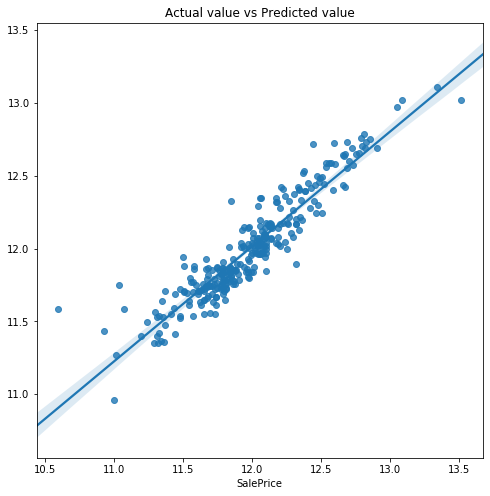

,Bias,Variance,MAE,MSE,RMSE
0,0.014871,0.014871,0.108313,0.024212,0.155602


In [94]:
random_forest_df=random_forest_regressor_grid(X_train, X_test, y_test, y_train)
random_forest_df

In [0]:
#Random Forest with Random search
def random_forest_regressor_random(X_train, X_test, y_test, y_train):
    print(X_train.shape,X_test.shape,y_train.shape)
    rfr=RandomForestRegressor()
    rfr.fit(X_train, y_train)
    y_pred_train=rfr.predict(X_train)
    print("RMSE for train is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    parameters={'criterion':["mse"],
                'max_depth': range(3,7),
              "bootstrap": [True, False],
              'n_estimators': (10, 20, 30, 50, 80, 100),
              'max_features': ['sqrt', 'log2', None]}
    #rfr=GridSearchCV(rfr, parameters,cv=10, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    rfr=RandomizedSearchCV(rfr, param_distributions = parameters,
                                   n_iter = 100,
                                   n_jobs = -1)
    rfr.fit(X_train, y_train)
    print(rfr.best_score_)
    print(rfr.best_estimator_)
    rfr=rfr.best_estimator_
    rfr.fit(X_train, y_train)
    y_pred_train=rfr.predict(X_train)
    print("RMSE for train is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    y_pred_test=rfr.predict(X_test)
    print("RMSE for test is {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

    plt.figure(figsize=(8,8))
    sns.regplot(y_test, y_pred_test)
    plt.title("Actual value vs Predicted value")
    plt.show()
    
    return create_result_dataframe(y_test, y_pred_test)

(1168, 105) (292, 105) (1168,)
RMSE for train is 0.056845461637035084
0.8387974924609889
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
RMSE for train is 0.11205827557151062
RMSE for test is 0.15473895468958884


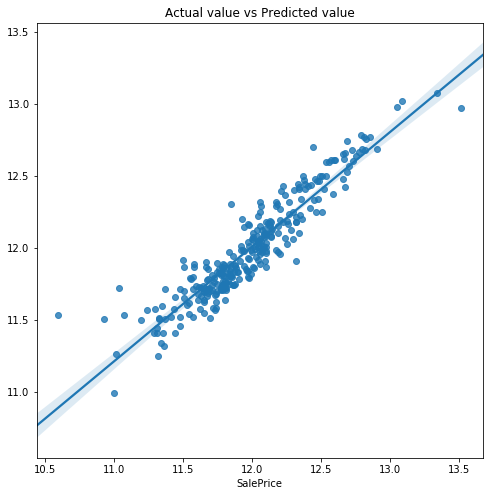

,Bias,Variance,MAE,MSE,RMSE
0,0.010269,0.010269,0.108123,0.023944,0.154739


In [96]:
random_forest_rnddf=random_forest_regressor_random(X_train, X_test, y_test, y_train)
random_forest_rnddf

**20. Applying other variance of regression model - Decision Tree**

In [0]:
#Decision Tree with Grid Search
def decision_tree_regressor_grid(X_train, X_test, y_test, y_train):
    print(X_train.shape,X_test.shape,y_train.shape)
    dtg=DecisionTreeRegressor()
    dtg.fit(X_train, y_train)
    y_pred_train=dtg.predict(X_train)
    print("RMSE for train is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    parameters={'criterion':["mse", "friedman_mse", "mae"],
                 'max_depth': range(3,7),
               'max_features': ['sqrt', 'log2', 'auto', None]}
    dtg=GridSearchCV(dtg, parameters,cv=10, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    dtg.fit(X_train, y_train)
    print(dtg.best_score_)
    print(dtg.best_estimator_)
    dtg=dtg.best_estimator_
    dtg.fit(X_train, y_train)
    y_pred_train=dtg.predict(X_train)
    print("RMSE for train is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    y_pred_test=dtg.predict(X_test)
    print("RMSE for test is {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

    plt.figure(figsize=(8,8))
    sns.regplot(y_test, y_pred_test)
    plt.title("Actual value vs Predicted value")
    plt.show()

    return create_result_dataframe(y_test, y_pred_test)

(1168, 105) (292, 105) (1168,)
RMSE for train is 0.0012988688963447065
-0.03908573822489653
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
RMSE for train is 0.14390698357536888
RMSE for test is 0.19988418177081446


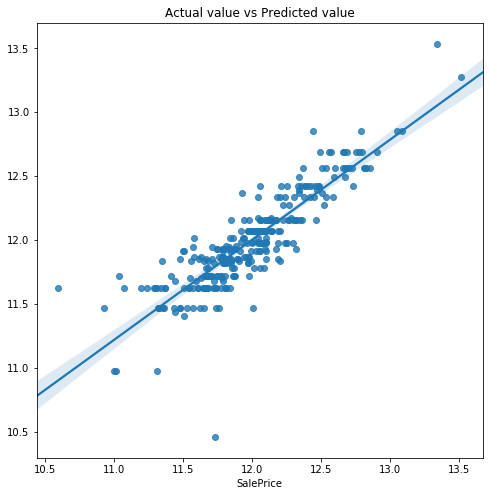

,Bias,Variance,MAE,MSE,RMSE
0,0.002759,0.002759,0.139647,0.039954,0.199884


In [99]:
decision_tree_grddf=decision_tree_regressor_grid(X_train, X_test, y_test, y_train)
decision_tree_grddf

**21. Finalizing the preferred model from Linear Regression, Decision Tree and Random Forest**

After running the available regression models, we have below results

**Linear Regression with model** - 

*LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)*

In [0]:
linear_grid_df

,Bias,Variance,MAE,MSE,RMSE
0,0.00647,0.00647,0.10051,0.018145,0.134705


**Random Forest with model** - 

*RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)*

In [0]:
random_forest_df

,Bias,Variance,MAE,MSE,RMSE
0,0.011025,0.011025,0.107654,0.024003,0.15493


**Decision Tree with model -** 

*DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')*

In [0]:
decision_tree_grddf

,Bias,Variance,MAE,MSE,RMSE
0,0.00116,0.00116,0.140379,0.040584,0.201454


**22. Result**

Since errors along with Bias and Variance is low in Linear regression, so we will prefer Linear regression model  as below -

***LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)***

In [0]:
linear_grid_df

,Bias,Variance,MAE,MSE,RMSE
0,0.00647,0.00647,0.10051,0.018145,0.134705
